In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

# **I. Part I**

In [ ]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


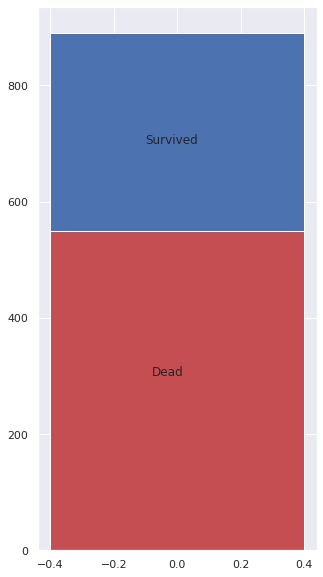

In [ ]:
temp = df['Survived'].value_counts()

_ , ax = plt.subplots(figsize =(5, 10))
plt.bar(0, temp[0], color='r')
plt.bar(0, temp[1], bottom=temp[0], color='b')
plt.text(-0.10,700,'Survived')
plt.text(-0.08,300,'Dead')

plt.show()

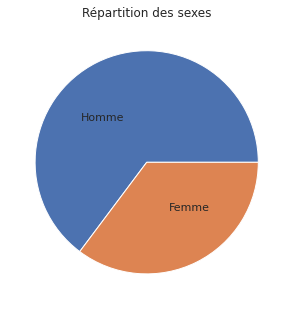

In [ ]:
temp = df['Sex'].value_counts()

_ , ax = plt.subplots(figsize =(5, 10))
plt.pie(temp, labels=['Homme', 'Femme'], labeldistance=0.45)
plt.title("Répartition des sexes")

plt.show()

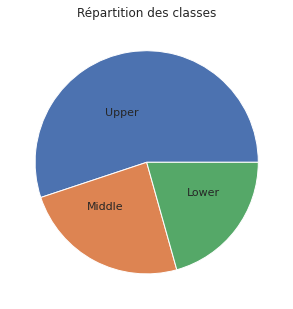

In [ ]:
temp = df['Pclass'].value_counts()

_ , ax = plt.subplots(figsize =(5, 10))
plt.pie(temp, labels=['Upper', 'Middle', 'Lower'], labeldistance=0.45)
plt.title("Répartition des classes")

plt.show()

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


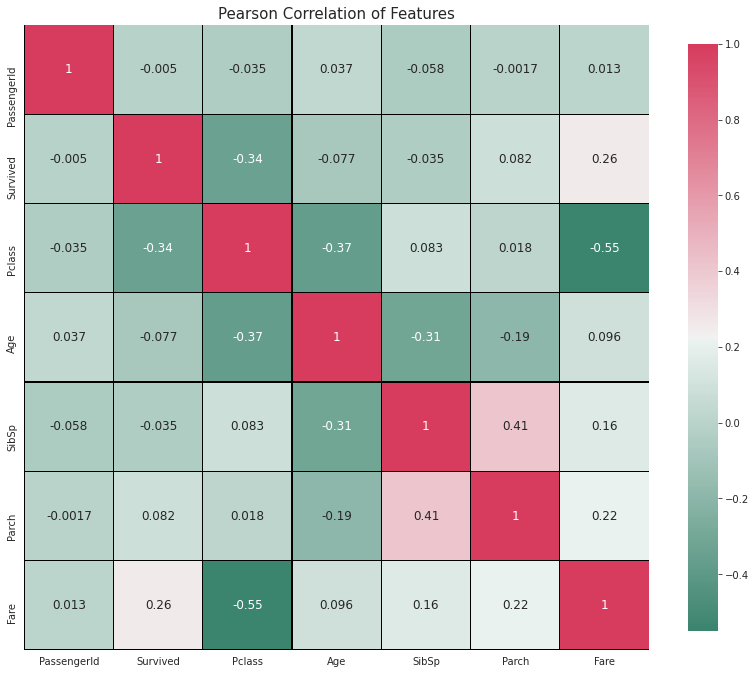

In [ ]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(160, 4, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

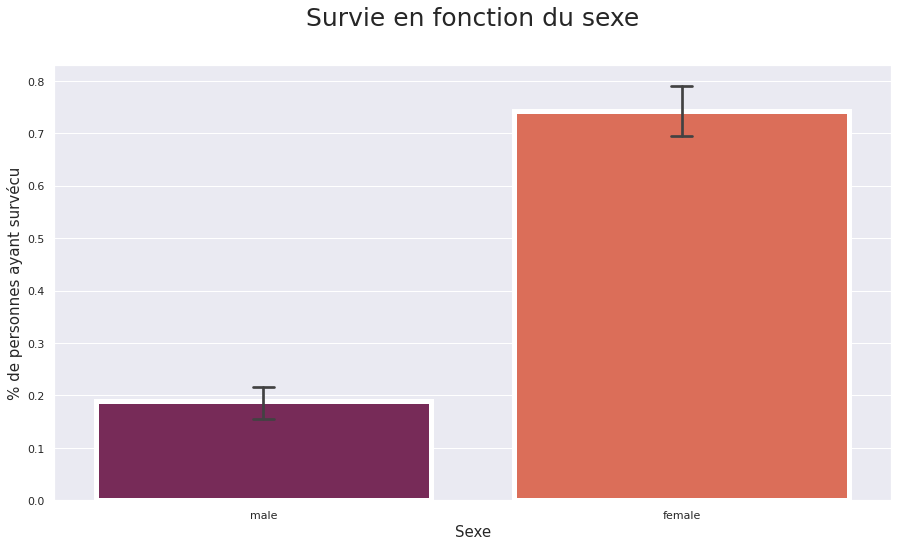

In [ ]:
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=df, 
                 palette = 'rocket',
                 linewidth=5,
                 order = ['male','female'],
                 capsize = .05,

                )

plt.title("Survie en fonction du sexe", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% de personnes ayant survécu", fontsize = 15, )
plt.xlabel("Sexe",fontsize = 15);

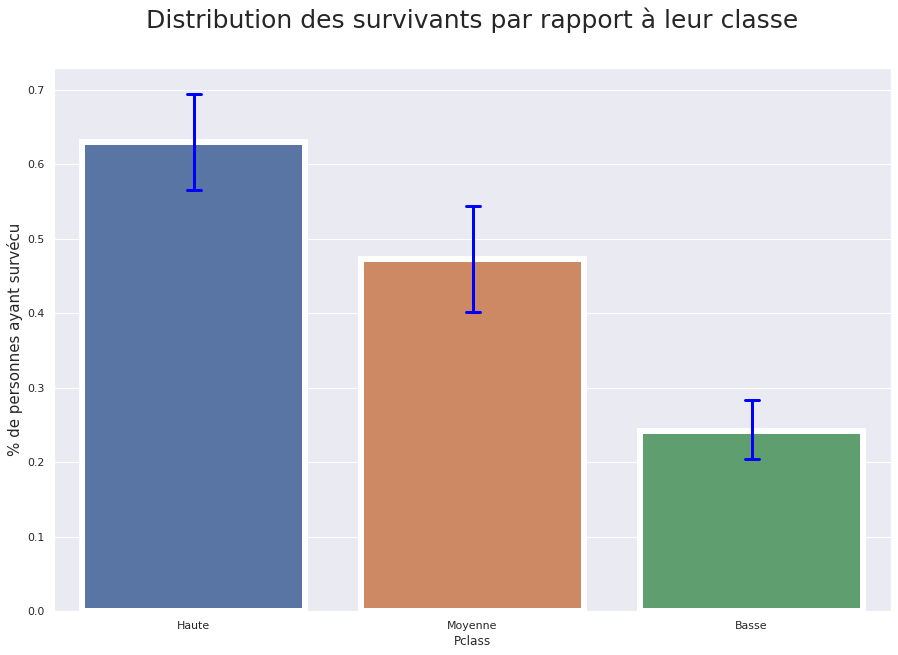

In [ ]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=df, 
            linewidth=6,
            capsize = .05,
            errcolor='blue',
            errwidth = 3
            

           )
plt.title("Distribution des survivants par rapport à leur classe", fontsize = 25, pad=40)
#plt.xlabel("Classe", fontsize = 15);
plt.ylabel("% de personnes ayant survécu", fontsize = 15);
names = ['Haute', 'Moyenne', 'Basse']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);

Text(0.5, 0, 'Age')

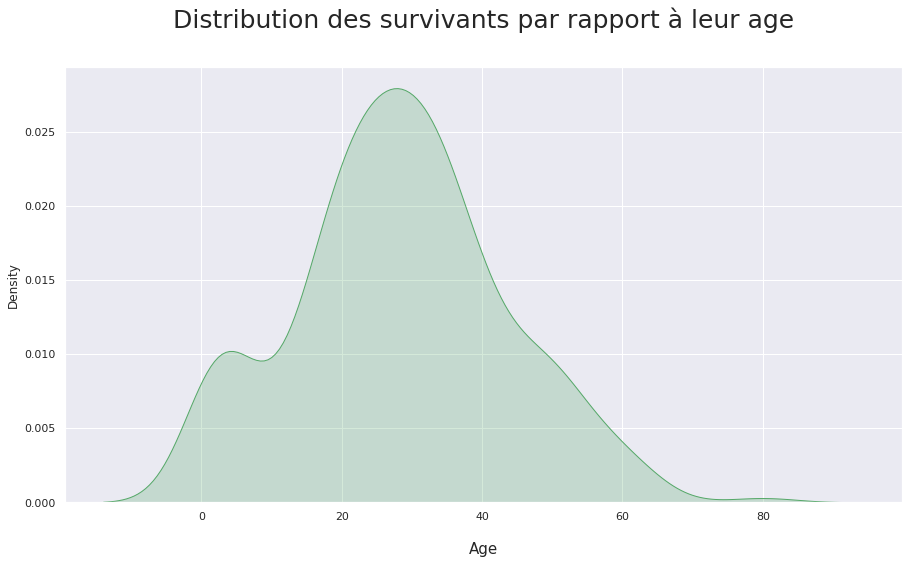

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
#ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Age'] , color='gray',shade=True,label='Morts')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Age'] , color='g',shade=True, label='Survivants')
plt.title('Distribution des survivants par rapport à leur age', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
#plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

# **II. Pre-processing**

> ## **1 - Embarked**

In [ ]:
print("Il y a {}% de valeurs manquantes pour le champ 'Embarked'.".format(round((df.shape[0]-df[~df['Embarked'].isnull()].shape[0])/df.shape[0]*100, 3)))

Il y a 0.224% de valeurs manquantes pour le champ 'Embarked'.


→ On peut juste les enlever.

In [ ]:
data_CLEAN = df[~df['Embarked'].isnull()]
data_CLEAN = data_CLEAN.reset_index()
data_CLEAN.shape

(889, 13)

> ## **2 - Age**


In [ ]:
print("Il y a {}% de valeurs manquantes pour le champ 'Age'.".format(round((df.shape[0]-df[~df['Age'].isnull()].shape[0])/df.shape[0]*100, 3)))

NameError: ignored

→ 3 solutions
soit on prédit l'âge en fonction des différents paramètres, soit on rajoute la 

*   Soit on prédit l'âge en fonction des différents paramètres → corrélation entre les variables explicatives
*   soit on rajoute la médiane en fonction des autres paramètres → moins précis
*   Soit on les enlève → beaucoup de valeurs amputées






>> ### **2.1 - AGE estimé avec KNN**



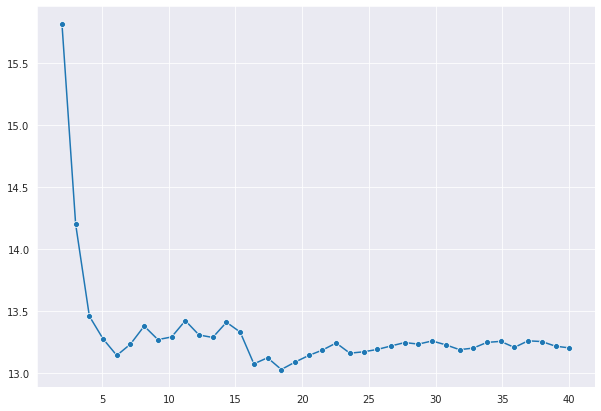

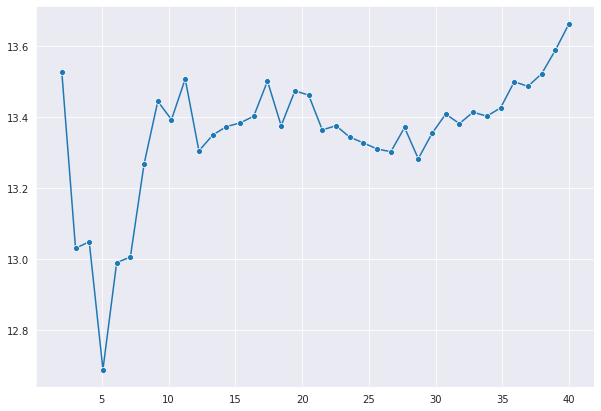

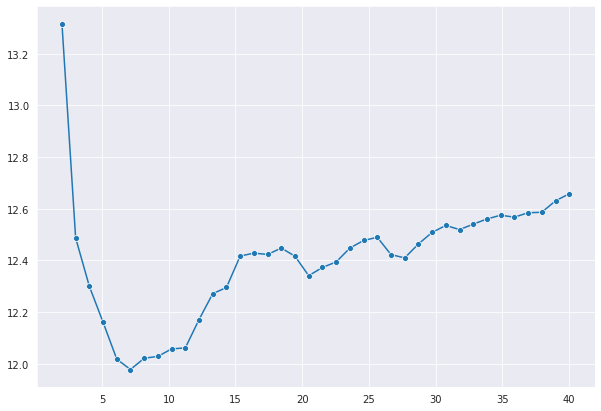

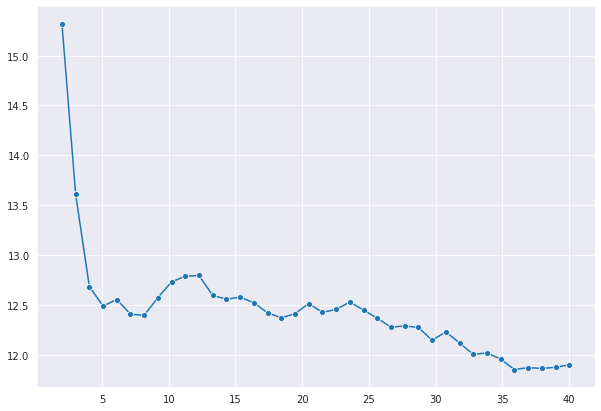

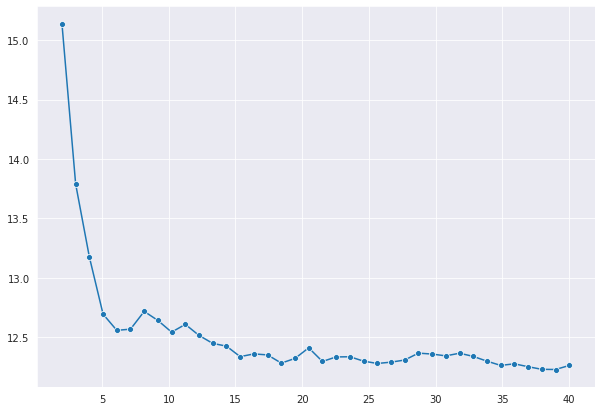

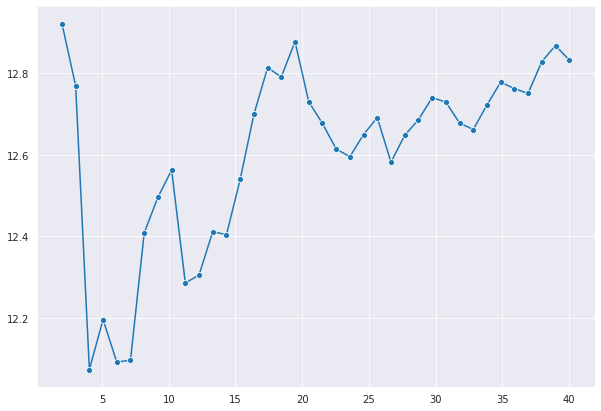

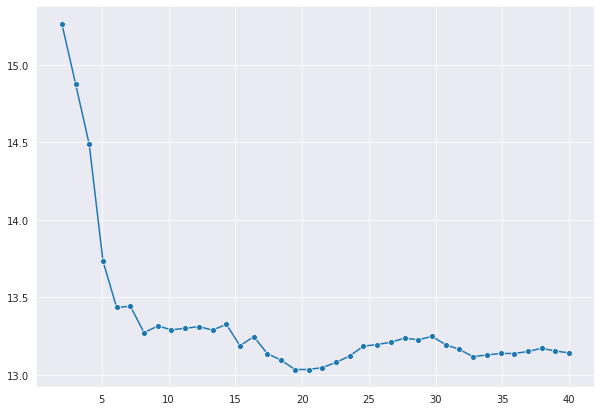

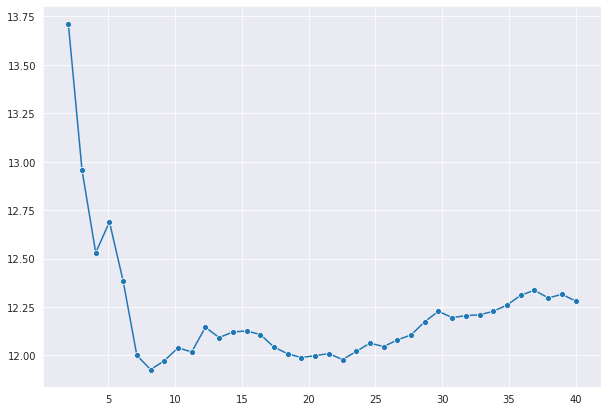

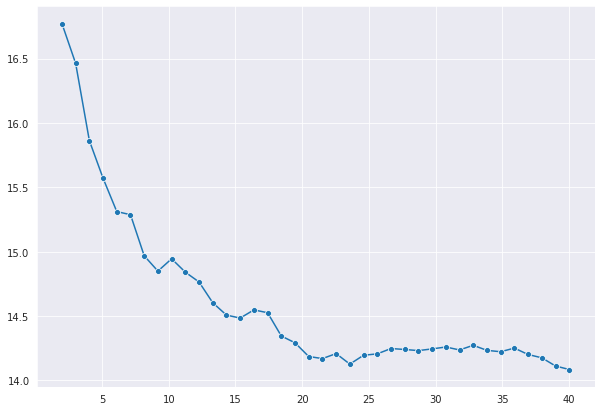

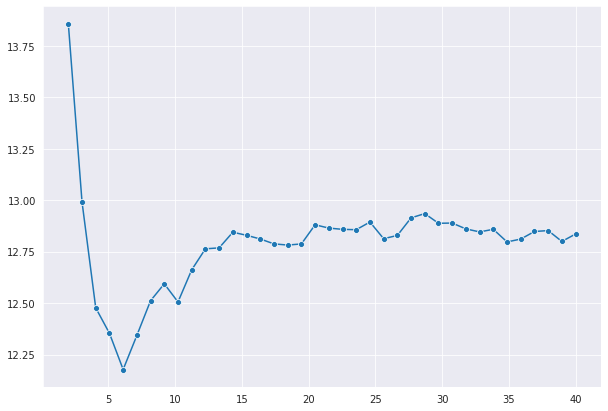

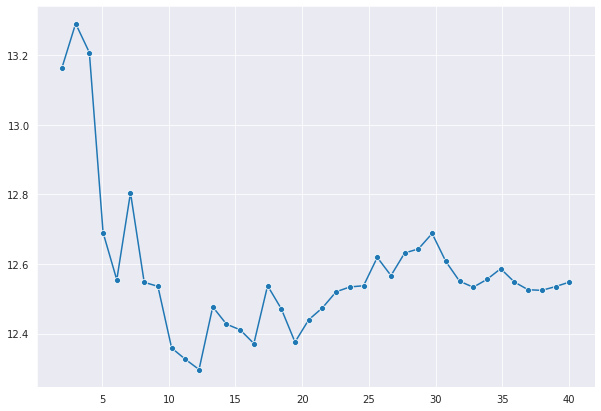

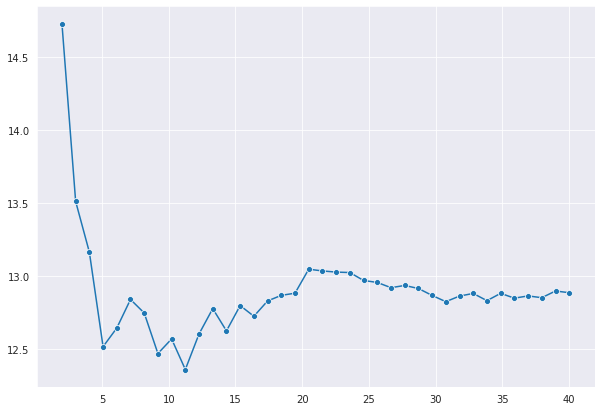

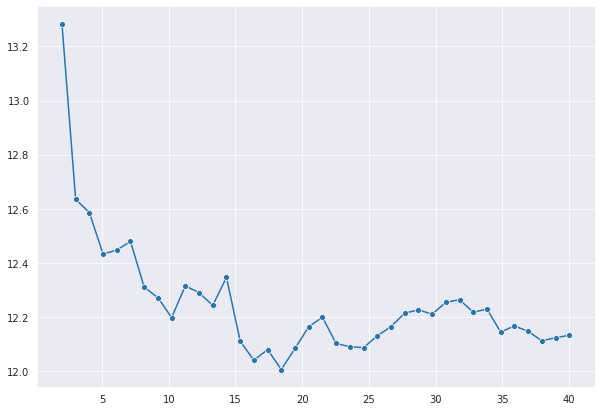

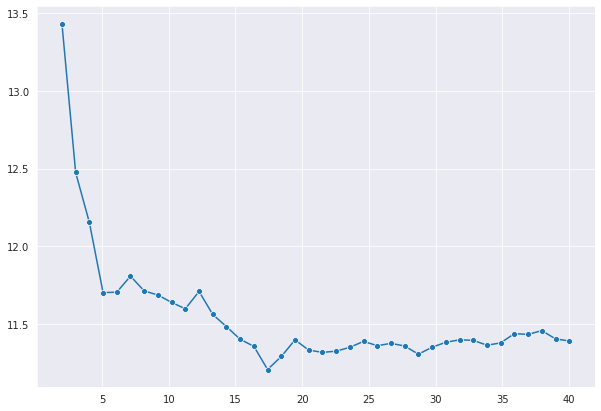

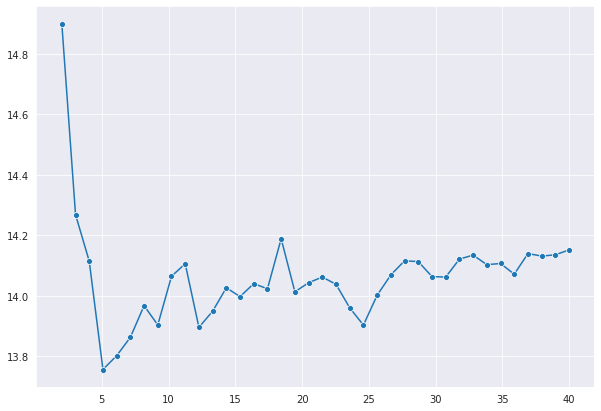

In [ ]:
df_temp = data_CLEAN[~data_CLEAN['Age'].isnull()]

X_age = df_temp[['Pclass', 'Fare', 'Parch','SibSp']].values
y_age = df_temp['Age'].values

for i in range(15):
  X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X_age, y_age, test_size=0.20)

  scaler.fit(X_age_train)

  X_age_train = scaler.transform(X_age_train)
  X_age_test = scaler.transform(X_age_test)

  RMSE = []

  for n in range(2,40):
    KNN_regressor = KNeighborsRegressor(n_neighbors=n)
    KNN_regressor.fit(X_age_train, y_age_train)
    pred_KNN = KNN_regressor.predict(X_age_test)
    RMSE.append(math.sqrt(mean_squared_error(y_age_test,pred_KNN)))

  inter = np.linspace(start=2, stop=40, num=38)
  fig = plt.figure(figsize=(10,7))
  sns.lineplot(x=inter, y = RMSE, marker='o')
  plt.show()

RMSE à ~11.8 au minimum : pas incroyablement précis, 

> → on crée une variable catégorielle donnant un intervalle pour l'âge en plus.



>> #### **2.1.1 - Prédiction de l'âge pour les valeurs manquantes avec n=9 pour KNN**





In [ ]:
df_temp = data_CLEAN[~data_CLEAN['Age'].isnull()]
df_temp_prediction = data_CLEAN[data_CLEAN['Age'].isnull()]

X_age = df_temp[['Pclass', 'Fare', 'Parch']].values
X_age_prediction = df_temp_prediction[['Pclass', 'Fare', 'Parch']].values
y_age = df_temp['Age'].values

scaler.fit(X_age)

X_age = scaler.transform(X_age)
X_age_prediction = scaler.transform(X_age_prediction)

KNN_regressor = KNeighborsRegressor(n_neighbors=15)
KNN_regressor.fit(X_age, y_age)
pred_KNN = KNN_regressor.predict(X_age_prediction)
pred_KNN = np.round(pred_KNN,0)

i=0
for k in range(len(data_CLEAN)):
  if (data_CLEAN.isnull()['Age'][k]):
    data_CLEAN['Age'][k]=pred_KNN[i]
    i+=1

data_CLEAN = data_CLEAN.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


>> #### **2.1.2 - Variable catégorielle pour l'âge**

In [ ]:
conditions = [
    (data_CLEAN['Age']>=0) & (data_CLEAN['Age']<=9),
    (data_CLEAN['Age']>=10) & (data_CLEAN['Age']<=19),
    (data_CLEAN['Age']>=20) & (data_CLEAN['Age']<=29),
    (data_CLEAN['Age']>=30) & (data_CLEAN['Age']<=39),
    (data_CLEAN['Age']>=40) & (data_CLEAN['Age']<=49),
    (data_CLEAN['Age']>=50) & (data_CLEAN['Age']<=59),
    (data_CLEAN['Age']>=60) & (data_CLEAN['Age']<=69),
    (data_CLEAN['Age']>=70) & (data_CLEAN['Age']<=79),
    (data_CLEAN['Age']>=80) & (data_CLEAN['Age']<=89),
    ]

choices = ['[0-9]',  '[10-19]', '[20-29]', '[30-39]', '[40-49]', '[50-59]', '[60-69]',
           '[70-79]', '[80-89]']
data_CLEAN['Age_range'] = np.select(conditions, choices, default='Other')


>> ### **2.1 - AGE estimé avec KNN sans variable catégorielle**


>> ## **3 - Cabin**

In [ ]:
print("Il y a {}% de valeurs manquantes pour le champ 'Cabin'.".format(round((df.shape[0]-df[~df['Cabin'].isnull()].shape[0])/df.shape[0]*100, 3)))

Il y a 77.104% de valeurs manquantes pour le champ 'Cabin'.


→ Beaucoup trop de valeurs manquantes, et probablement pas très utile, on peut enlever la colonne pour l'instant.

In [ ]:
data_CLEAN = data_CLEAN.drop(['Cabin'], axis=1)
data_CLEAN.head()

,level_0,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


>> ## **4 - Autre**

**Ticket** probablement pas très utile, on peut enlever **Name** pour simplifier, et **PassengerId** inutile aussi. On enlève aussi **Age** vu qu'on a créé une autre variable avec l'information.

In [ ]:
#avec age_range
#data_CLEAN = data_CLEAN.drop(['Ticket', 'Name', 'PassengerId', 'level_0', 'index', 'Age'], axis=1)
#data_CLEAN.head()

#sans age_age
data_CLEAN = data_CLEAN.drop(['Ticket', 'Name', 'PassengerId', 'level_0', 'index'], axis=1)
data_CLEAN.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


>> ## **5 - Dummy variable**

In [ ]:
##FINAL DATA V3 ----------------------------------------- SANS AGE_RANGE

#dummies creation
data_CLEAN=pd.get_dummies(data=data_CLEAN, columns=['Embarked', 'Sex', 'Pclass', 'SibSp', 'Parch'], prefix=['Embarked','Sex', 'Pclass',  'SibSp', 'Parch'])
## -------------------------------------------------------------
data_CLEAN['Parch_9']=0
data_CLEAN

,Survived,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,0,22.0,7.2500,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,38.0,71.2833,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,26.0,7.9250,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,35.0,53.1000,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,35.0,8.0500,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,27.0,13.0000,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
885,1,19.0,30.0000,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
886,0,11.0,23.4500,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
887,1,26.0,30.0000,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# **III. Neural Network**

In [ ]:
## Sequential NN

X = data_CLEAN.iloc[:,1:].values
y = data_CLEAN['Survived'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

N_input = X.shape[1]

model = Sequential()
model.add(Dense(26, input_dim=N_input, activation='relu'))
model.add(Dense(6, activation='relu'))


model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=16)

accuracy = model.evaluate(X_train, y_train, verbose=0)
predictions = model.predict(X_test)

threshold = lambda x : 0 if x<0.5 else 1
vfunc = np.vectorize(threshold)
predictions_threshold = vfunc(predictions).flatten()

print("Accuracy =  {}".format(accuracy_score(y_test, predictions_threshold)))

Epoch 1/150
45/45 [==============================] - 0s 1ms/step - loss: 1.3852 - accuracy: 0.6029
Epoch 2/150
45/45 [==============================] - 0s 1ms/step - loss: 0.7589 - accuracy: 0.6194
Epoch 3/150
45/45 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.6722
Epoch 4/150
45/45 [==============================] - 0s 1ms/step - loss: 0.6126 - accuracy: 0.6832
Epoch 5/150
45/45 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.6651
Epoch 6/150
45/45 [==============================] - 0s 1ms/step - loss: 0.5544 - accuracy: 0.6912
Epoch 7/150
45/45 [==============================] - 0s 1ms/step - loss: 0.5920 - accuracy: 0.6614
Epoch 8/150
45/45 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.6923
Epoch 9/150
45/45 [==============================] - 0s 1ms/step - loss: 0.5727 - accuracy: 0.6691
Epoch 10/150
45/45 [==============================] - 0s 1ms/step - loss: 0.5896 - accuracy: 0.6766
Epoch 11/

# **IV. Test Training pre processing**

In [ ]:
# test pre processing

data_CLEAN_test = df_test[~df_test['Embarked'].isnull()]
data_CLEAN_test = data_CLEAN_test.reset_index()


#filling one missing fare value
fare = df_test[(df_test['Embarked']=='S') & (df_test['Sex']=='male') & (df_test['SibSp']==0) & (df_test['Pclass']==3)].mean()[5]
data_CLEAN_test.iloc[152,9] = fare


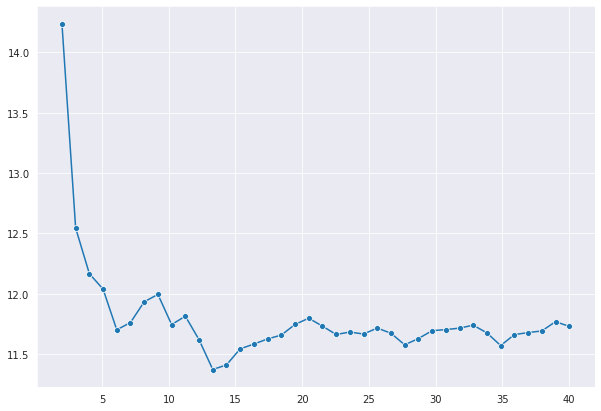

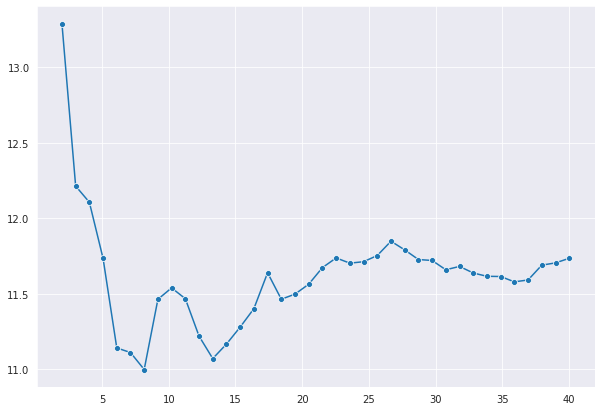

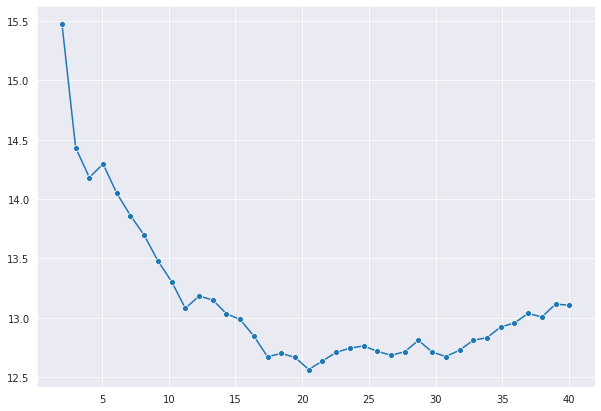

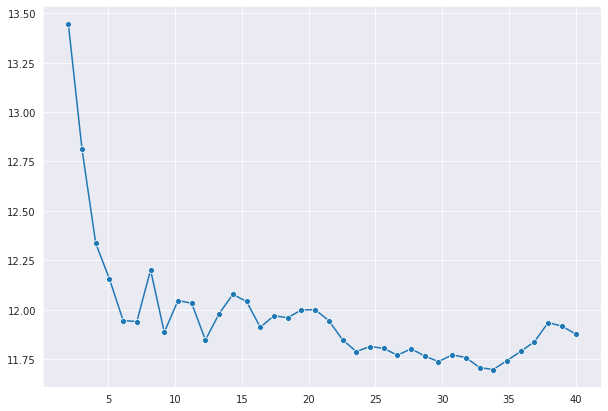

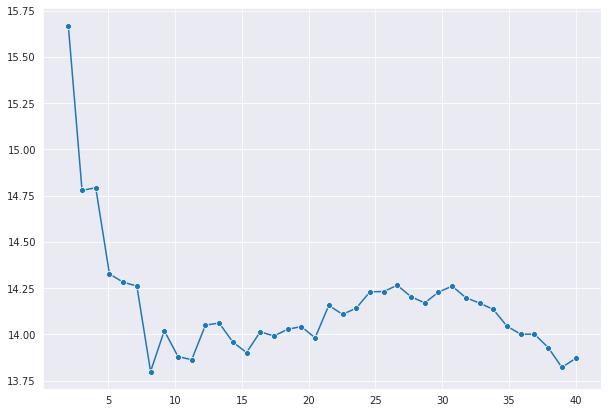

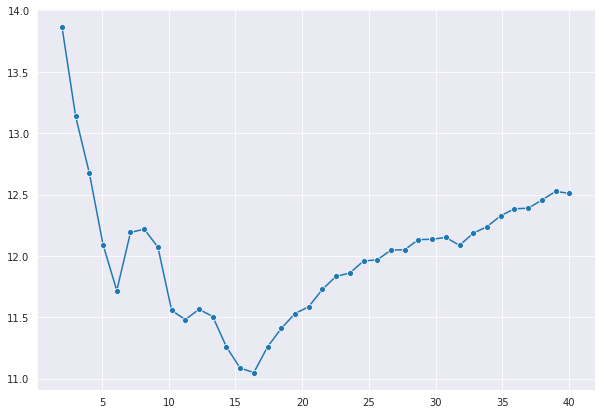

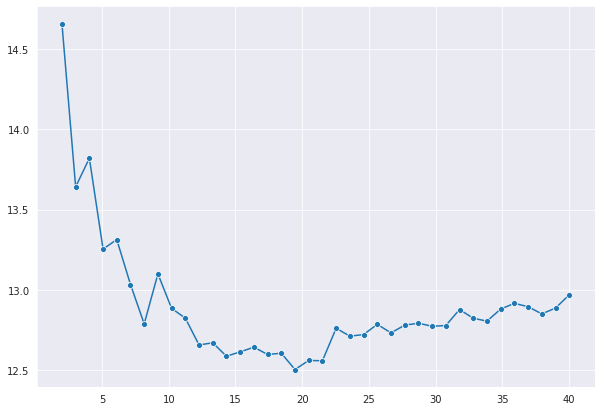

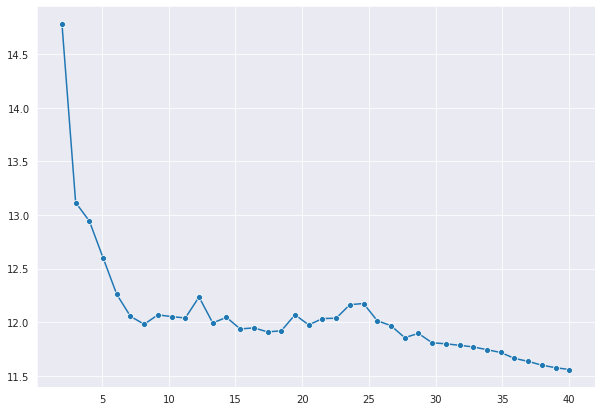

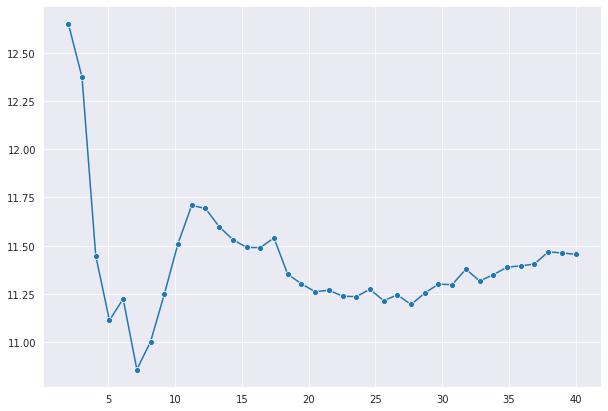

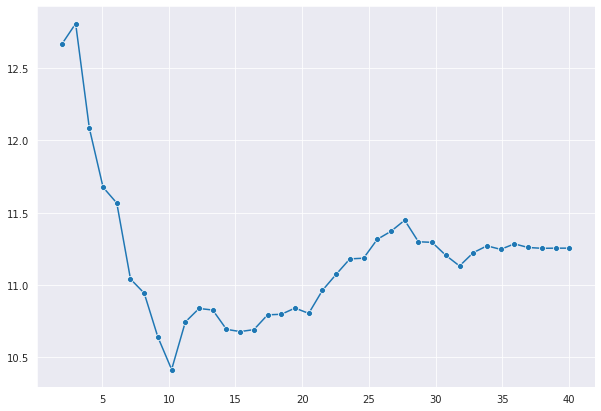

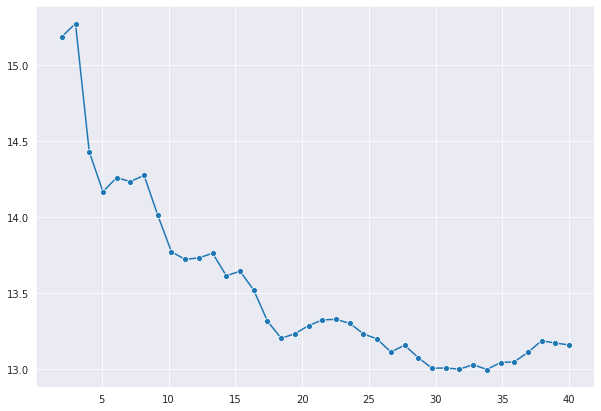

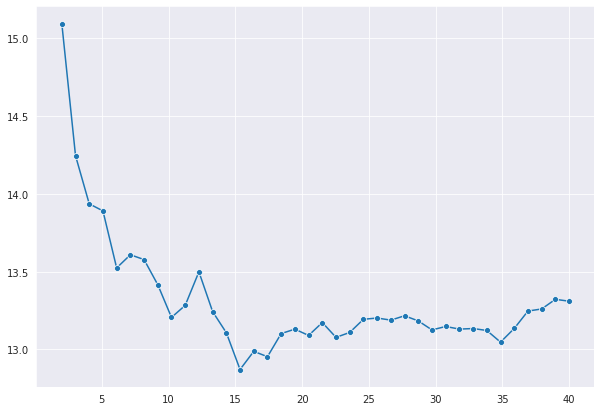

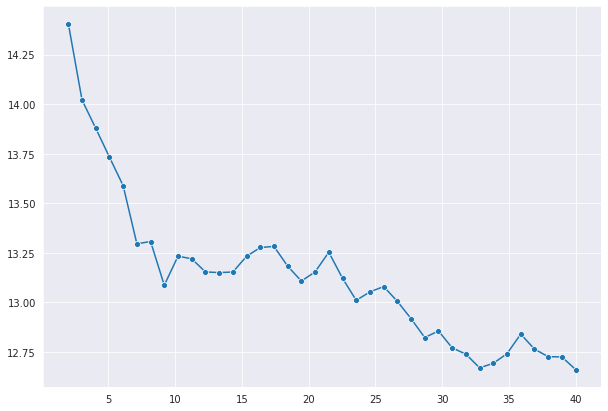

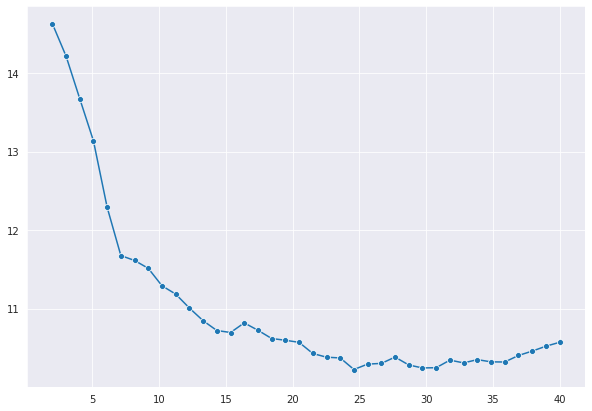

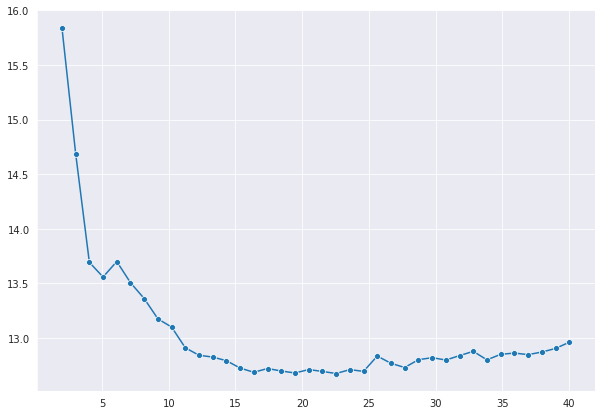

In [ ]:
df_temp = data_CLEAN_test[~data_CLEAN_test['Age'].isnull()]

X_age = df_temp[['Pclass', 'Fare', 'Parch','SibSp']].values
y_age = df_temp['Age'].values

for i in range(15):
  X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X_age, y_age, test_size=0.20)

  scaler.fit(X_age_train)

  X_age_train = scaler.transform(X_age_train)
  X_age_test = scaler.transform(X_age_test)

  RMSE = []

  for n in range(2,40):
    KNN_regressor = KNeighborsRegressor(n_neighbors=n)
    KNN_regressor.fit(X_age_train, y_age_train)
    pred_KNN = KNN_regressor.predict(X_age_test)
    RMSE.append(math.sqrt(mean_squared_error(y_age_test,pred_KNN)))

  inter = np.linspace(start=2, stop=40, num=38)
  fig = plt.figure(figsize=(10,7))
  sns.lineplot(x=inter, y = RMSE, marker='o')
  plt.show()

In [ ]:
#filling na values for Age
df_temp = data_CLEAN_test[~data_CLEAN_test['Age'].isnull()]
df_temp_prediction = data_CLEAN_test[data_CLEAN_test['Age'].isnull()]

X_age = df_temp[['Pclass', 'Fare', 'Parch']].values
X_age_prediction = df_temp_prediction[['Pclass', 'Fare', 'Parch']].values
y_age = df_temp['Age'].values

scaler.fit(X_age)

X_age = scaler.transform(X_age)
X_age_prediction = scaler.transform(X_age_prediction)

KNN_regressor = KNeighborsRegressor(n_neighbors=15)
KNN_regressor.fit(X_age, y_age)
pred_KNN = KNN_regressor.predict(X_age_prediction)
pred_KNN = np.round(pred_KNN,0)

i=0
for k in range(len(data_CLEAN_test)):
  if (data_CLEAN_test.isnull()['Age'][k]):
    data_CLEAN_test['Age'][k]=pred_KNN[i]
    i+=1

data_CLEAN_test = data_CLEAN_test.reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
